In [694]:
import numpy as np
from pandas import read_csv, DataFrame
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
from skbio.stats.composition import clr 
from tqdm import tqdm

In [196]:
level = 'Species'
amplicon = 'V3_V4'

data_tax_df = read_csv(f'/mnt/AsusShareI2/RUNS/runs-sonec/pike_csv_tables/{amplicon}_data_tax_df_{level}.csv', sep='\t', index_col=0)
#data_tax_df = DataFrame(data=clr(data_tax_df+0.0000001), index=data_tax_df.index, columns=data_tax_df.columns)

no_reads = np.sort(list(set([int(i.split('_')[3]) for i in data_tax_df.columns])))
samples = np.sort(list(set(['_'.join(i.split('_')[:3]) for i in data_tax_df.columns])))
corr_df = data_tax_df.corr('spearman')

In [548]:
data_tax_df

,V3_V4_1_100000_reads,V3_V4_1_10000_reads,V3_V4_1_1000_reads,V3_V4_1_100_reads,V3_V4_1_150000_reads,V3_V4_1_150_reads,V3_V4_1_200_reads,V3_V4_1_250_reads,V3_V4_1_300000_reads,V3_V4_1_30000_reads,...,V3_V4_R3_30000_reads,V3_V4_R3_3000_reads,V3_V4_R3_300_reads,V3_V4_R3_400000_reads,V3_V4_R3_500000_reads,V3_V4_R3_50000_reads,V3_V4_R3_5000_reads,V3_V4_R3_500_reads,V3_V4_R3_600000_reads,V3_V4_R3_700000_reads
OTU_94_uncultured bacterium,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
OTU_95_Lactococcus lactis,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
OTU_93_Lactococcus lactis,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
OTU_262_Lactococcus lactis,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
OTU_263_Acinetobacter radioresistens,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTU_137_Escherichia coli,0.098099,0.078789,0.105946,0.0,0.114533,0.0,0.0,0.000000,0.114235,0.097938,...,0.108887,0.108667,0.113333,0.105208,0.104078,0.105917,0.113040,0.108,0.105108,0.104004
OTU_41_Streptococcus thermophilus,0.114213,0.116604,0.137297,0.0,0.114449,0.0,0.0,0.000000,0.114151,0.114183,...,0.123658,0.127000,0.000000,0.125438,0.125450,0.123735,0.126564,0.132,0.125248,0.124403
OTU_103_Lactococcus lactis,0.105419,0.110081,0.102703,0.0,0.105636,0.0,0.0,0.106383,0.105361,0.102075,...,0.124298,0.000000,0.143333,0.128773,0.125362,0.127048,0.127574,0.144,0.128774,0.126606
OTU_59_Bifidobacterium animalis,0.128885,0.130772,0.118919,0.0,0.129150,0.0,0.0,0.114894,0.128815,0.131840,...,0.131768,0.123667,0.100000,0.130564,0.130319,0.129957,0.124748,0.104,0.130439,0.131058


In [171]:
sort_names = {}

for samp in samples:
    
    sort_names[samp] = {}
    
    for no in no_reads[:-1]:
        try:
        
            sort_names[samp][no] = corr_df[f'{samp}_{no}_reads'][f'{samp}_{no_reads[-1]}_reads']
        
        except: sort_names[samp][no] = 0
        
            
    sort_names[samp][no] = corr_df[f'{samp}_{no_reads[-1]}_reads'][f'{samp}_{no_reads[-1]}_reads']

sort_names = DataFrame(sort_names)    

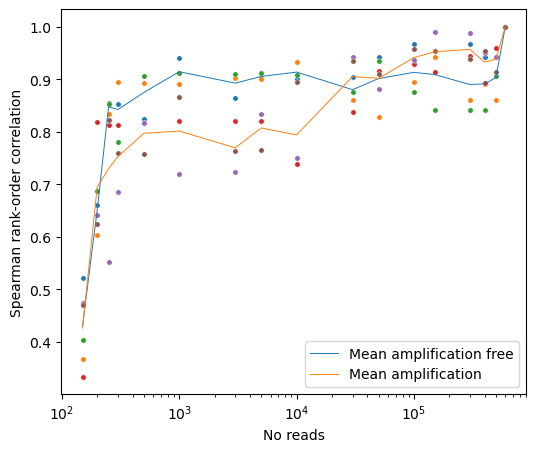

In [108]:
plt.figure(figsize=(6, 5))
for samp in sort_names.columns:
    
    sns.scatterplot(y=sort_names[samp], x=sort_names.index, s=15)

#$plt.boxplot(sort_names[['V3_V4_1', 'V3_V4_2', 'V3_V4_3']].T, positions=sort_names.index)
#plt.boxplot(sort_names[['V3_V4_R1', 'V3_V4_R2', 'V3_V4_R3']].T, positions=sort_names.index)

sns.lineplot(y=sort_names[['V3_V4_1', 'V3_V4_2', 'V3_V4_3']].mean(axis=1), x=sort_names.index, linewidth=.7, label='Mean amplification free')
sns.lineplot(y=sort_names[['V3_V4_R1', 'V3_V4_R2', 'V3_V4_R3']].mean(axis=1), x=sort_names.index, linewidth=.7, label='Mean amplification')


plt.legend(loc=4, fontsize=8)
plt.xlabel('No reads')
plt.ylabel('Spearman rank-order correlation')
#plt.ylim(0.5, 1)
plt.xscale('log')
#plt.yscale('log')
#plt.grid(alpha=.5)
#sns.despine(offset=10, trim=True)
plt.legend()
plt.show()

In [364]:
data_tax_df = read_csv(f'/mnt/AsusShareI2/RUNS/runs-sonec/pike_csv_tables/{amplicon}_data_tax_df_{level}.csv', sep='\t', index_col=0)


no_reads = np.sort(list(set([int(i.split('_')[3]) for i in data_tax_df.columns])))
samples = np.sort(list(set(['_'.join(i.split('_')[:3]) for i in data_tax_df.columns])))
corr_df = data_tax_df.corr('spearman')

sort_names = {}

for samp in samples:
    
    sort_names[samp] = {}
    
    for no in no_reads[:-1]:
        
        try: sort_names[samp][no] = data_tax_df[[f'{samp}_{no}_reads', f'{samp}_{no_reads[-1]}_reads']].std(axis=1).median()
        except: sort_names[samp][no] = 0    
    
    sort_names[samp][no] = corr_df[f'{samp}_{no_reads[-1]}_reads'][f'{samp}_{no_reads[-1]}_reads']

sort_names = DataFrame(sort_names) 

<>:16: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:16: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
/tmp/ipykernel_1081302/3644573634.py:16: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  try: sort_names[samp][no] = data_tax_df[[f'{samp}_{no}_reads'][f'{samp}_{no_reads[-1]}_reads']].std()


In [366]:
[f'{samp}_{no_reads[-1]}_reads']

['V1_V9_R3_700000_reads']

In [695]:
def parse_tab(amplicon, level, clr_use=False):
    
    data_tax_df = read_csv(f'/mnt/AsusShareI2/RUNS/runs-sonec/pike_csv_tables/{amplicon}_data_tax_df_{level}.csv', sep='\t', index_col=0)
    
    if clr_use == True:    
    
        data_tax_df = DataFrame(data=clr(data_tax_df.T+0.0000001).T, index=data_tax_df.index, columns=data_tax_df.columns)
    
    no_reads = np.sort(list(set([int(i.split('_')[3]) for i in data_tax_df.columns])))
    samples = np.sort(list(set(['_'.join(i.split('_')[:3]) for i in data_tax_df.columns])))
    corr_df = data_tax_df.corr('spearman')
    
    sort_names = {}
    
    for samp in samples:
        
        sort_names[samp] = {}
        
        for no in no_reads[2:-1]:
            
            try: 
                sub = data_tax_df[[f'{samp}_{no}_reads', f'{samp}_{no_reads[-1]}_reads']]
                sub = sub[sub.sum(axis=1) != 0]
                sort_names[samp][no] = sub.std(axis=1).median()#corr_df[f'{samp}_{no}_reads'][f'{samp}_{no_reads[-1]}_reads']
               # sort_names[samp][no] = abs(np.median(data_tax_df[f'{samp}_{no}_reads'] - data_tax_df[f'{samp}_{no_reads[-1]}_reads']))
                
            except: sort_names[samp][no] = np.inf    
        
        sort_names[samp][no] = data_tax_df[[f'{samp}_{no_reads[-1]}_reads', f'{samp}_{no_reads[-1]}_reads']].std(axis=1).median()# corr_df[f'{samp}_{no_reads[-1]}_reads'][f'{samp}_{no_reads[-1]}_reads']
    
    sort_names = DataFrame(sort_names) 

    return sort_names, corr_df, data_tax_df

In [696]:
amplicons = ['V3_V4', 'V1_V9']
levels = ['Genus', 'Species', 'OTU']
full_data = {}

for amplicon in amplicons:
    
    full_data[amplicon] = {}
    
    for level in levels:
        
        full_data[amplicon][level], _, _ = parse_tab(amplicon, level, clr_use=False)
        

In [697]:
def plot_preset(sort_names, axs, amplicon, level, logscale=False):
    
    colormap = ['#FFFBDA', '#FFEC9E', '#ED9455', '#003C43', '#135D66', '#77B0AA']
    
    for idx, samp in enumerate(sort_names.columns):
        if 'R' in samp:
            
            sns.scatterplot(y=sort_names[samp], x=sort_names.index, s=10, c=colormap[idx], marker='s', label=samp, ax=axs, edgecolor='black')
        else: sns.scatterplot(y=sort_names[samp], x=sort_names.index, s=10, c=colormap[idx], label=samp, ax=axs, edgecolor='black')
        
            
    #plt.boxplot(sort_names[['V1_V9_1', 'V1_V9_2', 'V1_V9_3']].T, positions=sort_names.index)
    #plt.boxplot(sort_names[['V1_V9_R1', 'V1_V9_R2', 'V1_V9_R3']].T, positions=sort_names.index)
    
    y1=np.min(sort_names[[f'{amplicon}_1', f'{amplicon}_2', f'{amplicon}_3']], axis=1)
    y2=np.max(sort_names[[f'{amplicon}_1', f'{amplicon}_2', f'{amplicon}_3']], axis=1)
    x=sort_names.index
    
   # axs.fill_between(x, y1, y2, alpha=.1, color='#FF9800', linewidth=0)
    
    y1=np.min(sort_names[[f'{amplicon}_R1', f'{amplicon}_R2', f'{amplicon}_R3']], axis=1)
    y2=np.max(sort_names[[f'{amplicon}_1', f'{amplicon}_2', f'{amplicon}_3']], axis=1)
    x=sort_names.index
    
   # axs.fill_between(x, y1, y2, alpha=.1, color='#A1C398', linewidth=0)
    
    
    sns.lineplot(y=sort_names[[f'{amplicon}_R1', f'{amplicon}_R2', f'{amplicon}_R3']].mean(axis=1), 
                 x=sort_names.index, linewidth=1.0, color='#FF9800', 
                 label='Mean amplification', ax=axs)

    #sns.lineplot(y=sort_names[['V1_V9_1', 'V1_V9_2', 'V1_V9_3']].mean(axis=1), 
     #            x=sort_names.index, linewidth=.3, color='white')
    
    sns.lineplot(y=sort_names[[f'{amplicon}_1', f'{amplicon}_2', f'{amplicon}_3']].mean(axis=1), x=sort_names.index, 
                 linewidth=1.2, color='#A1C398',  
                 label='Mean amplification free', ax=axs)
    #sns.lineplot(y=sort_names[['V1_V9_R1', 'V1_V9_R2', 'V1_V9_R3']].mean(axis=1), 
    #             x=sort_names.index, linewidth=.3, color='white')
    
    axs.set_xlabel('No reads')
    #axs.set_ylabel('Spearman rank-order correlation')
    axs.set_ylabel('Median standard deviation')
    axs.set_title(f'{amplicon.replace("_", "-")} {level}')
    axs.legend(loc='best', fontsize=5.5)
    axs.grid(alpha=.5)
   # sns.despine(offset=10)
    if logscale==True: axs.set_xscale('log')
    

2it [00:00,  3.54it/s]


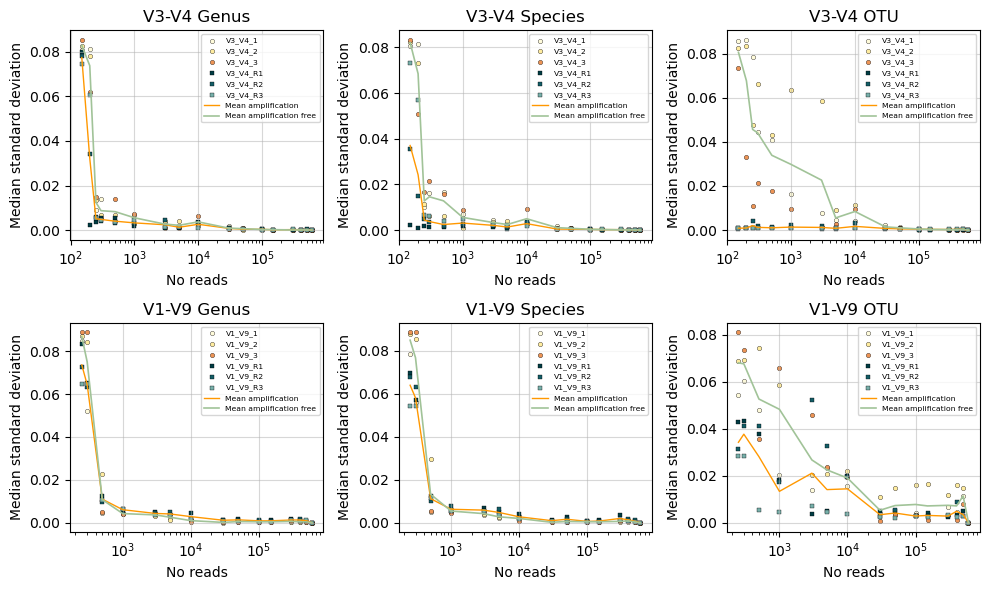

In [698]:
fig, axs_all = plt.subplots(2, 3, figsize=(10, 6))


for idx_x, at in tqdm(enumerate(amplicons)):
    for idx_y, lev in enumerate(levels): 
        #print(at,lev)
        plot_preset(full_data[at][lev], axs_all[idx_x][idx_y], at, lev, logscale=True)

plt.tight_layout()
plt.savefig('VIZ/STD_validation.pdf')
plt.savefig('VIZ/STD_validation.png', dpi=800)
plt.show()

In [539]:
data_tax_df[f'{samp}_{no}_reads'] - data_tax_df[f'{samp}_{no}_reads']

OTU_94_uncultured bacterium             0.0
OTU_95_Lactococcus lactis               0.0
OTU_93_Lactococcus lactis               0.0
OTU_262_Lactococcus lactis              0.0
OTU_263_Acinetobacter radioresistens    0.0
                                       ... 
OTU_137_Escherichia coli                0.0
OTU_41_Streptococcus thermophilus       0.0
OTU_103_Lactococcus lactis              0.0
OTU_59_Bifidobacterium animalis         0.0
OTU_12_Mycoplasma gallisepticum         0.0
Name: V3_V4_R3_600000_reads, Length: 325, dtype: float64

In [537]:
full_data[at][lev]

,V3_V4_1,V3_V4_2,V3_V4_3,V3_V4_R1,V3_V4_R2,V3_V4_R3
150,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...
200,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...
250,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...
300,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...
500,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...
1000,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...
3000,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...
5000,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...
10000,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...
30000,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...,Blautia 0.000000 Aeromonas ...


In [ ]:

доля кадой бактерии и число ридов 


In [486]:
amplicon = 'V3_V4'
level = 'OTU'

data_tax_df = read_csv(f'/mnt/AsusShareI2/RUNS/runs-sonec/pike_csv_tables/{amplicon}_data_tax_df_{level}.csv', sep='\t', index_col=0)


no_reads = np.sort(list(set([int(i.split('_')[3]) for i in data_tax_df.columns])))
samples = np.sort(list(set(['_'.join(i.split('_')[:3]) for i in data_tax_df.columns])))
corr_df = data_tax_df.corr('spearman')

sort_names = {}

for samp in samples:
    
    sort_names[samp] = {}
    
    for no in no_reads[2:-1]:
        
        try: 
            sub = data_tax_df[[f'{samp}_{no}_reads', f'{samp}_{no_reads[-1]}_reads']]
            sub = sub[sub.sum(axis=1) != 0]
            sort_names[samp][no] = sub.std(axis=1).median()#corr_df[f'{samp}_{no}_reads'][f'{samp}_{no_reads[-1]}_reads']
        except: sort_names[samp][no] = np.inf    
    
    sort_names[samp][no] = data_tax_df[[f'{samp}_{no_reads[-1]}_reads', f'{samp}_{no_reads[-1]}_reads']].std(axis=1).median()# corr_df[f'{samp}_{no_reads[-1]}_reads'][f'{samp}_{no_reads[-1]}_reads']

sort_names = DataFrame(sort_names) 

In [487]:
sub

,V3_V4_R3_600000_reads,V3_V4_R3_700000_reads
OTU_181_Kluyvera ascorbata,0.000000,0.000372
OTU_130_uncultured bacterium,0.000000,0.000575
OTU_188_Klebsiella pneumoniae,0.000714,0.000000
OTU_110_Mycoplasma gallisepticum,0.000000,0.000389
OTU_198_Klebsiella pneumoniae,0.000000,0.000761
OTU_222_uncultured bacterium,0.000000,0.000867
OTU_159_Lactococcus lactis,0.000000,0.000611
OTU_83_unidentified,0.001208,0.000000
OTU_240_uncultured bacterium,0.001252,0.000000
OTU_301_uncultured bacterium,0.000000,0.001319


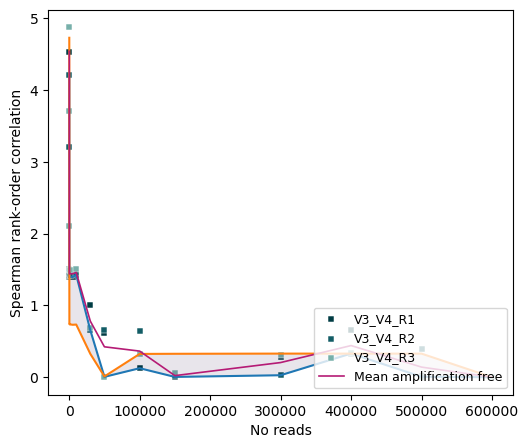

In [422]:
plt.figure(figsize=(6, 5))
colormap = ['#10439F', '#874CCC', '#C65BCF', '#003C43', '#135D66', '#77B0AA']

sort_names= full_data['V3_V4']['Genus']
amplicon = 'V3_V4'

for idx, samp in enumerate(sort_names.columns):
    if 'R' in samp:
        
        sns.scatterplot(y=sort_names[samp], x=sort_names.index, s=20, c=colormap[idx], marker='s', label=samp)
   # else: sns.scatterplot(y=sort_names[samp], x=sort_names.index, s=20, c=colormap[idx], label=samp)
    
        
#plt.boxplot(sort_names[['V1_V9_1', 'V1_V9_2', 'V1_V9_3']].T, positions=sort_names.index)
#plt.boxplot(sort_names[['V1_V9_R1', 'V1_V9_R2', 'V1_V9_R3']].T, positions=sort_names.index)

y1=np.min(sort_names[[f'{amplicon}_1', f'{amplicon}_2', f'{amplicon}_3']], axis=1)
y2=np.max(sort_names[[f'{amplicon}_1', f'{amplicon}_2', f'{amplicon}_3']], axis=1)
x=sort_names.index

#plt.fill_between(x, y1, y2, alpha=.1, color='#B51B75', linewidth=0)

y1=np.min(sort_names[[f'{amplicon}_R1', f'{amplicon}_R2', f'{amplicon}_R3']], axis=1)
y2=np.max(sort_names[[f'{amplicon}_1', f'{amplicon}_2', f'{amplicon}_3']], axis=1)
x=sort_names.index

plt.fill_between(x, y1, y2, alpha=.1, color='#1E0342', linewidth=0)
plt.plot(x, y1)
plt.plot(x, y2)

sns.lineplot(y=sort_names[[f'{amplicon}_R1', f'{amplicon}_R2', f'{amplicon}_R3']].mean(axis=1), 
             x=sort_names.index, linewidth=1.2, color='#B51B75', 
             label='Mean amplification free')

#sns.lineplot(y=sort_names[['V1_V9_1', 'V1_V9_2', 'V1_V9_3']].mean(axis=1), 
 #            x=sort_names.index, linewidth=.3, color='white')

#sns.lineplot(y=sort_names[[f'{amplicon}_1', f'{amplicon}_2', f'{amplicon}_3']].mean(axis=1), x=sort_names.index, 
#             linewidth=1.2, color='#1E0342',  
#             label='Mean amplification')
#sns.lineplot(y=sort_names[['V1_V9_R1', 'V1_V9_R2', 'V1_V9_R3']].mean(axis=1), 
#             x=sort_names.index, linewidth=.3, color='white')

plt.xlabel('No reads')
plt.ylabel('Spearman rank-order correlation')
#plt.ylim(0.5, 1)
#plt.xscale('log')
#plt.yscale('log')
#plt.grid(alpha=.5)
plt.legend(loc=4, fontsize=9)
plt.show()

In [417]:
y1

150       4.214612
200       1.393795
250       1.400513
300       1.395590
500       1.397867
1000      1.403110
3000      1.398748
5000      1.396280
10000     1.426936
30000     0.654280
50000     0.005139
100000    0.125466
150000    0.004177
300000    0.027675
400000    0.329956
500000    0.006683
600000    0.000000
dtype: float64

In [418]:
y2

150       4.729022
200       3.270096
250       1.284604
300       0.741564
500       0.744137
1000      0.734806
3000      0.733888
5000      0.730782
10000     0.733716
30000     0.325303
50000     0.010528
100000    0.324535
150000    0.326366
300000    0.328975
400000    0.328636
500000    0.328400
600000    0.000000
dtype: float64

In [423]:
sort_names[[f'{amplicon}_1', f'{amplicon}_2', f'{amplicon}_3']]

,V3_V4_1,V3_V4_2,V3_V4_3
150,3.793506,4.729022,3.785560
200,3.012287,3.270096,2.208716
250,0.412502,1.284604,0.952458
300,0.417639,0.741564,0.404188
500,0.411135,0.744137,0.403828
1000,0.408809,0.734806,0.403545
3000,0.408917,0.733888,0.402178
5000,0.408641,0.730782,0.401604
10000,0.409376,0.733716,0.399360
30000,0.002828,0.325303,0.007567


In [314]:
_, _, tab =parse_tab("V3_V4", 'Genus', clr_use=True)
tab

,V3_V4_1_100000_reads,V3_V4_1_10000_reads,V3_V4_1_1000_reads,V3_V4_1_100_reads,V3_V4_1_150000_reads,V3_V4_1_150_reads,V3_V4_1_200_reads,V3_V4_1_250_reads,V3_V4_1_300000_reads,V3_V4_1_30000_reads,...,V3_V4_R3_30000_reads,V3_V4_R3_3000_reads,V3_V4_R3_300_reads,V3_V4_R3_400000_reads,V3_V4_R3_500000_reads,V3_V4_R3_50000_reads,V3_V4_R3_5000_reads,V3_V4_R3_500_reads,V3_V4_R3_600000_reads,V3_V4_R3_700000_reads
Blautia,-0.066076,-0.066076,-0.066076,-0.066076,-0.066076,-0.066076,-0.066076,-0.066076,-0.066076,-0.066076,...,-0.066076,-0.066076,-0.066076,-0.066076,-0.066076,-0.066076,-0.066076,-0.066076,-0.066076,-0.066076
Aeromonas,-0.073716,-0.073716,-0.073716,-0.073716,-0.073716,-0.073716,-0.073716,-0.073716,-0.073716,-0.073716,...,-0.073716,-0.073716,-0.073716,-0.073716,-0.073716,-0.073716,-0.073716,-0.073716,-0.073716,-0.073716
Kluyvera,-1.042697,-1.042697,-1.042697,-1.042697,-1.042697,-1.042697,-1.042697,-1.042697,-1.042697,-1.042697,...,-1.042697,-1.042697,-1.042697,-1.042697,-1.042697,-1.042697,-1.042697,-1.042697,-1.042697,7.178230
Lactobacillus,6.367255,-1.585976,-1.585976,-1.585976,-1.585976,-1.585976,-1.585976,-1.585976,6.366708,-1.585976,...,-1.585976,-1.585976,-1.585976,-1.585976,6.557507,-1.585976,-1.585976,-1.585976,6.327311,-1.585976
Rahnella1,-0.952781,-0.952781,-0.952781,-0.952781,-0.952781,-0.952781,-0.952781,-0.952781,-0.952781,-0.952781,...,-0.952781,-0.952781,-0.952781,-0.952781,-0.952781,8.093354,-0.952781,-0.952781,-0.952781,-0.952781
uncultured,-0.792411,-0.792411,-0.792411,-0.792411,-0.792411,-0.792411,-0.792411,-0.792411,-0.792411,-0.792411,...,8.689780,-0.792411,-0.792411,8.756451,8.724246,7.735010,-0.792411,-0.792411,8.642430,8.275660
Pseudocitrobacter,-0.931972,-0.931972,-0.931972,-0.931972,-0.931972,-0.931972,-0.931972,-0.931972,-0.931972,-0.931972,...,-0.931972,-0.931972,-0.931972,8.172998,8.142893,8.114163,-0.931972,-0.931972,8.309233,8.166248
Staphylococcus,5.234228,-4.413312,-4.413312,-4.413312,5.229458,-4.413312,-4.413312,-4.413312,5.233680,5.375119,...,5.499636,-4.413312,-4.413312,4.918693,4.941602,4.955564,-4.413312,-4.413312,4.925522,5.157342
Enterobacter,-0.137762,-0.137762,-0.137762,-0.137762,-0.137762,-0.137762,-0.137762,-0.137762,-0.137762,-0.137762,...,-0.137762,-0.137762,-0.137762,-0.137762,-0.137762,-0.137762,-0.137762,-0.137762,-0.137762,-0.137762
Escherichia-Shigella,1.765970,1.710172,1.693415,-12.179855,1.771349,-12.179855,2.311561,1.736752,1.768745,1.740815,...,1.729714,1.718771,1.760819,1.695939,1.692938,1.700553,1.758227,1.712617,1.694820,1.690699


In [ ]:
y1=np.min(sort_names[['V1_V9_1', 'V1_V9_2', 'V1_V9_3']], axis=1)
y2=np.max(sort_names[['V1_V9_1', 'V1_V9_2', 'V1_V9_3']], axis=1)
x=sort_names.index

plt.fill_between(x, y1, y2)


In [174]:
for i in enumerate(sort_names.columns):
    print(i)

(0, 'V1_V9_1')
(1, 'V1_V9_2')
(2, 'V1_V9_3')
(3, 'V1_V9_R1')
(4, 'V1_V9_R2')
(5, 'V1_V9_R3')


In [118]:
sort_names[['V1_V9_1', 'V1_V9_2', 'V1_V9_3']].std(axis=1)

250       0.236339
300       0.134070
500       0.248736
1000      0.199619
3000      0.166753
5000      0.138525
10000     0.163335
30000     0.001278
50000     0.009133
100000    0.002609
150000    0.016465
300000    0.002260
400000    0.033092
500000    0.003707
600000    0.000000
dtype: float64

In [119]:
sort_names[['V1_V9_R1', 'V1_V9_R2', 'V1_V9_R3']].std(axis=1)

250       0.083114
300       0.014864
500       0.119067
1000      0.014689
3000      0.012535
5000      0.128945
10000     0.040949
30000     0.011370
50000     0.028736
100000    0.013109
150000    0.006371
300000    0.055722
400000    0.035679
500000    0.023774
600000    0.000000
dtype: float64

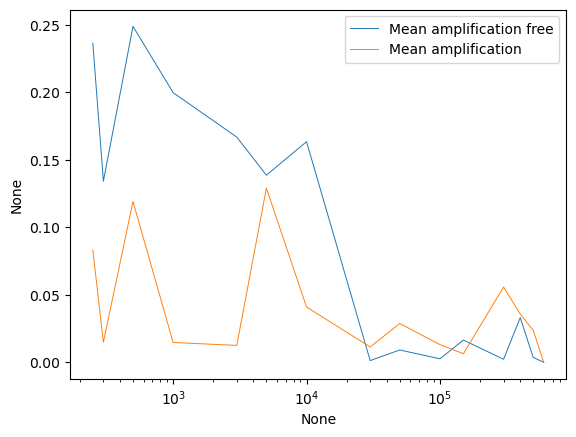

In [121]:
sns.lineplot(y=sort_names[['V1_V9_1', 'V1_V9_2', 'V1_V9_3']].std(axis=1), x=sort_names.index, linewidth=.7, label='Mean amplification free')
sns.lineplot(y=sort_names[['V1_V9_R1', 'V1_V9_R2', 'V1_V9_R3']].std(axis=1), x=sort_names.index, linewidth=.7, label='Mean amplification')
plt.xscale('log')


In [659]:
def get_compose_changer(amplicon, level):
    data_tax_df = read_csv(f'/mnt/AsusShareI2/RUNS/runs-sonec/pike_csv_tables/{amplicon}_data_tax_df_{level}.csv', sep='\t', index_col=0)
    
    compose_changer = {}
    
    no_reads = np.sort(list(set([int(i.split('_')[3]) for i in data_tax_df.columns])))
    samples = np.sort(list(set(['_'.join(i.split('_')[:3]) for i in data_tax_df.columns])))
    
    sort_names = {}
    
    for samp in samples:
        
        compose_changer[samp] = {}
        
        for no in no_reads[2:]:
        
            compose_changer[samp][no] = {}
               
            for otu in data_tax_df.index:
                try: 
    
                    compose_changer[samp][no][otu] = data_tax_df[f'{samp}_{no}_reads'][otu]
                
                except:
                    
                    compose_changer[samp][no][otu] = 0#data_tax_df[f'{samp}_{no}_reads'][otu]
                    
    return compose_changer

In [652]:
reampf = {}
origin = {}


    
for no in no_reads[2:-1]:
    
    reampf[no] = {}
    origin[no] = {}
    
    for otu in data_tax_df.index:
        
        reampf[no][otu] = []
        
        for samp in samples:
            if 'R' in samp:
                
              reampf[no][otu].append(data_tax_df[f'{samp}_{no}_reads'][otu])
        

        origin[no][otu] = []
        
        for samp in samples:
            if 'R' not in samp:
                
              origin[no][otu].append(data_tax_df[f'{samp}_{no}_reads'][otu])
    
        reampf[no][otu] = np.mean(reampf[no][otu])
        origin[no][otu] = np.mean(origin[no][otu])


    
reampf = DataFrame(reampf)
origin = DataFrame(origin)

In [664]:
amplicons = ['V3_V4', 'V1_V9']
levels = ['Genus', 'Species', 'OTU']
collector_data = {}

for amplicon in amplicons:
    
    collector_data[amplicon] = {}
    
    for level in levels:
        
        collector_data[amplicon][level] = get_compose_changer(amplicon, level)
        

In [690]:
plt.figure(figsize=(6, 5))

def plot_template(ax, compose_changer_samp, at, lev):
    
    for samp in DataFrame(compose_changer).columns:
        
        compose_changer_samp = DataFrame(compose_changer[samp])
        
        if 'R' in samp:
            for no in compose_changer_samp.columns:
        
                sns.scatterplot(y=compose_changer_samp[no], x=[no]*len(compose_changer_samp.index), c='grey', s=10, ax=ax, edgecolor='black', linewidth=0.08)
                
                 
        else:
            for no in compose_changer_samp.columns:
        
                sns.scatterplot(y=compose_changer_samp[no], x=[no]*len(compose_changer_samp.index), c='orange', s=10, ax=ax, edgecolor='black', linewidth=0.08)
    #for otu in origin.index:
        
    #    sns.lineplot(y=origin.loc[otu], x=origin.columns, c='orange')
    ax.grid(alpha=0.5)
    ax.set_title(f'{at} {lev}')
    ax.set_xlabel('No reads')
    ax.set_ylabel('Relative abundance')
    ax.set_xscale('log')
    ax.set_yscale('log')


<Figure size 600x500 with 0 Axes>

2it [00:05,  2.78s/it]


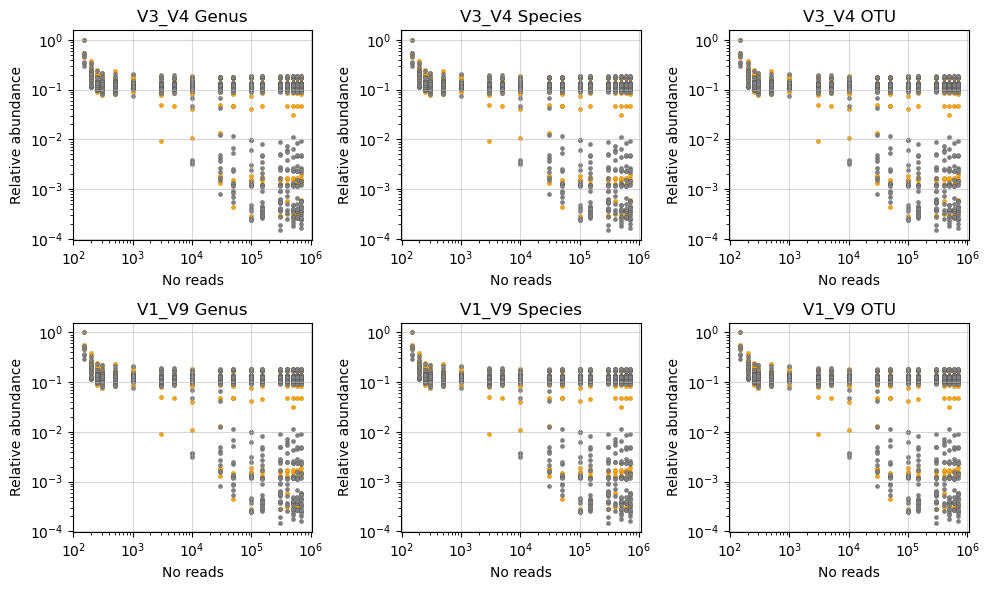

In [699]:
fig, axs_all = plt.subplots(2, 3, figsize=(10, 6))


for idx_x, at in tqdm(enumerate(amplicons)):
    for idx_y, lev in enumerate(levels): 
        #print(at,lev)
        plot_template(axs_all[idx_x][idx_y], collector_data[at][lev], at, lev)

plt.tight_layout()
plt.savefig('VIZ/SPECS_validation.pdf')
plt.savefig('VIZ/SPECS_validation.png', dpi=800)
plt.show()

In [12]:
import numpy as np
from os import listdir
from pandas import read_csv, DataFrame
all_data = {}

for samp in np.sort(listdir('/mnt/AsusShareI2/RUNS/runs-krivonos/PIKE_DATA/BENCHMARK/benchmarks/')):
    
    opn_tab = read_csv(f'/mnt/AsusShareI2/RUNS/runs-krivonos/PIKE_DATA/BENCHMARK/benchmarks/{samp}', sep='\t')
    all_data[samp.split('.')[0]] = {'Time' : opn_tab['h:m:s'][0], 'RAM' : opn_tab['max_rss'][0]}    

In [16]:
DataFrame(all_data).T

,Time,RAM
1000,0:03:33,1633.47
10000,0:17:00,3759.39
100000,1:55:53,21504.54
30000,0:27:33,6114.73
5000,0:06:21,2618.5
50000,0:46:11,10480.64


In [17]:
opn_tab

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
0,2771.4218,0:46:11,10480.64,60102.46,10075.19,10271.9,0.0,1329.7,104.5,3108.93
